In [1]:
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt

def bar_graph(df: pd.DataFrame):

    #df.groupby(["Topic", "Sentiment"]).count().unstack('Sentiment').plot.bar()
    df_count = df
    df_count.loc[df_count["Topic"] == 'O', "Topic"] = "Omicron"
    df_count.loc[df_count["Topic"] == 'V', "Topic"] = "Vaccine"
    df_count.loc[df_count["Topic"] == 'N', "Topic"] = "News"
    df_count.loc[df_count["Topic"] == 'I', "Topic"] = "Influence"
    df_count.loc[df_count["Topic"] == 'P', "Topic"] = "Opinion"
    df_count.loc[df_count["Sentiment"] == 'P', "Sentiment"] = "Positive"
    df_count.loc[df_count["Sentiment"] == 'N', "Sentiment"] = "Negative"
    df_count.loc[df_count["Sentiment"] == 'E', "Sentiment"] = "Neutral"

    df_count = df_count.groupby(["Topic", "Sentiment"])["Twitts"].count()
    print(df_count.head(5))
    df_count.unstack("Sentiment").plot.bar()
    plt.title("Histogram of different topics and sentiments")
    plt.ylabel("Count")
    plt.xticks(rotation = 0)
    plt.show()
    



In [ ]:
def word_cloud(df: pd.DataFrame):
    
    text = df['Twitts'].values 

    wordcloud = WordCloud().generate(str(text))

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Topic      Sentiment
Influence  Negative     55
           Neutral      38
           Positive     44
News       Negative     17
           Neutral      87
Name: Twitts, dtype: int64


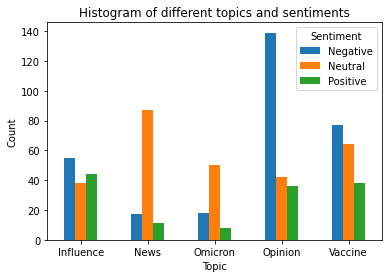

In [3]:
if __name__ =="__main__":
    df = pd.read_csv(r'C:\Users\hshao4\COMP598-Project\data\new_clear_twitts_anno.tsv',sep='\t', encoding= 'unicode_escape')
    bar_graph(df)